# A standardized and reproducible method to measure decision-making in mice: Data

This Jupyter notebooks shows how to access the data via the [Open Neurophysiology Environment (ONE) interface in Python](https://ibllib.readthedocs.io/en/latest/02_tutorial_python.html). The particular ONE implementation used in this notebook ("ONE light") only requires a local copy of the data, organized in a hierarchy of appropriately named subfolders and file names.

We start by importing the ONE light implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from oneibl.onelight import ONE

By default, this ONE implementation looks for data in the current directory.

In [2]:
pwd

'/src/IBL-pipeline/notebooks/notebooks_tutorial/202105_public_data_release'

In [3]:
!cd one_data/ibl-behavioral-data-Dec2019

We create the main ONE() instance that we will use to access the data.

In [4]:
one = ONE()

We search all sessions that have a given dataset type pattern.

In [5]:
eids = one.search(['_ibl_trials.*'])

We select the tenth session.

In [6]:
eid = eids[10]
print(f"Loading session {eid}.")

Loading session angelakilab/Subjects/IBL-T1/2019-02-20/001.


We list all dataset types available in that session.

In [7]:
dset_types = one.list(eid)
print(f"Available dataset types: {', '.join(dset_types)}")

Available dataset types: _ibl_trials.choice, _ibl_trials.contrastLeft, _ibl_trials.contrastRight, _ibl_trials.feedbackType, _ibl_trials.feedback_times, _ibl_trials.goCueTrigger_times, _ibl_trials.goCue_times, _ibl_trials.included, _ibl_trials.intervals, _ibl_trials.itiDuration, _ibl_trials.probabilityLeft, _ibl_trials.repNum, _ibl_trials.response_times, _ibl_trials.rewardVolume, _ibl_trials.stimOn_times


We load a single dataset.

In [8]:
print(f"Loading {dset_types[0]}")
choice = one.load_dataset(eid, dset_types[0])
print(choice.shape)

Loading _ibl_trials.choice
(1330,)


We load an entire object (a kind of Python dictionary).

In [9]:
print("Loading the _ibl_trials object.")
trials = one.load_object(eid, "_ibl_trials")
for key, value in trials.items():
    print(key, value.shape)

Loading the _ibl_trials object.
choice (1330,)
contrastLeft (1330,)
contrastRight (1330,)
feedbackType (1330,)
feedback_times (1330,)
goCueTrigger_times (1330,)
goCue_times (1330,)
included (1330,)
intervals (1330, 2)
itiDuration (1330,)
probabilityLeft (1330,)
repNum (1330,)
response_times (1330,)
rewardVolume (1330,)
stimOn_times (1330,)


We make a very basic plot.

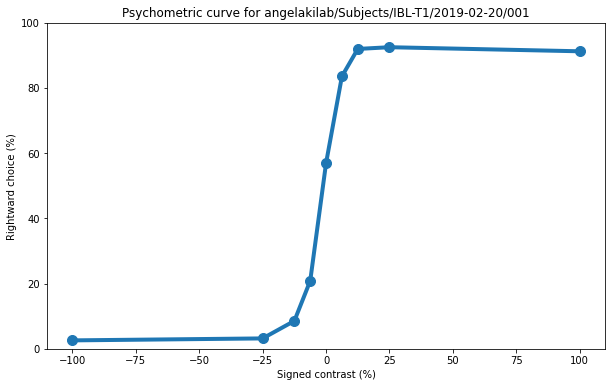

In [10]:
out = []
for sgn, contrast in ((-1, trials.contrastRight), (+1, trials.contrastLeft)):
    for c in np.unique(contrast)[::sgn]:
        if not np.isnan(c) and (c != 0 or sgn == +1):
            out.append((sgn * c, (trials.choice[contrast == c] == +1).mean()))
out = np.array(out) * 100

plt.figure(figsize=(10, 6))
plt.plot(out[:, 0], out[:, 1], 'o-', lw=4, ms=10)
plt.xlabel("Signed contrast (%)")
plt.ylabel("Rightward choice (%)")
plt.ylim(0, 100)
plt.title("Psychometric curve for %s" % eid);